In [11]:
import matplotlib.pyplot as plt
import struct
import numpy as np

In [14]:
with open("debug_pixels/a_samples.bin", "rb") as fin:
  samples_cnt = struct.unpack("i", fin.read(4))[0]
  samples = np.array(struct.unpack("f" * samples_cnt * 2, fin.read(4 * samples_cnt * 2))).reshape(samples_cnt, 2)
  print("samples.size() = ", len(samples))
  #labels = np.array(struct.unpack("i" * samples_cnt, fin.read(4 * samples_cnt)))
  #line = struct.unpack("f" * 3, fin.read(4 * 3))

with open("debug_pixels/pix_0419_0155.bin", "rb") as fin: 
   linesNum = struct.unpack("i", fin.read(4))[0]
   print("linesNum = ", linesNum)
   line = struct.unpack("f" * 3, fin.read(4 * 3))
   labels = np.array(struct.unpack("i" * samples_cnt, fin.read(4 * samples_cnt))) 
    

samples.size() =  64
linesNum =  1


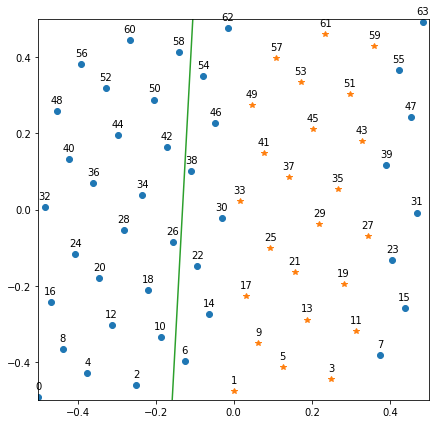

In [15]:
plt.figure(0, (7, 7))
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.plot(samples[labels == 0][:, 0], samples[labels == 0][:, 1], 'o')
plt.plot(samples[labels == 1][:, 0], samples[labels == 1][:, 1], '*')

for i in range(len(samples)):
  plt.annotate(str(i), samples[i], textcoords="offset points", xytext=(0,8),ha='center')

x = np.linspace(-0.5, 0.5)
plt.plot(x, -(line[0] / line[1] * x + line[2] / line[1]))

In [ ]:
idx = 38
line[0] * samples[idx][0] + line[1] * samples[idx][1] + line[2]

In [ ]:
labels == 1